In [1]:
pip install --upgrade scikit-learn numpy matplotlib threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from classifiers import Classifier, KMeans
from sklearn.cluster import KMeans as SKMeans
import numpy as np
import matplotlib.pyplot as plt
from feature_reduction import PrincipleComponentAnalysis
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Part 1 - KMeans

In [4]:
#Data Generation

np.random.seed(42)
resting = np.random.multivariate_normal(mean=[60, 10], cov=[[20, 100], [100, 20]], size=1000)
stressed = np.random.multivariate_normal(mean=[100, 80], cov=[[50, 20], [20, 50]], size=1000)



/var/folders/j1/2d31w8mj36dcmbgr8l2lptp40000gn/T/ipykernel_75124/1431297240.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting = np.random.multivariate_normal(mean=[60, 10], cov=[[20, 100], [100, 20]], size=1000)


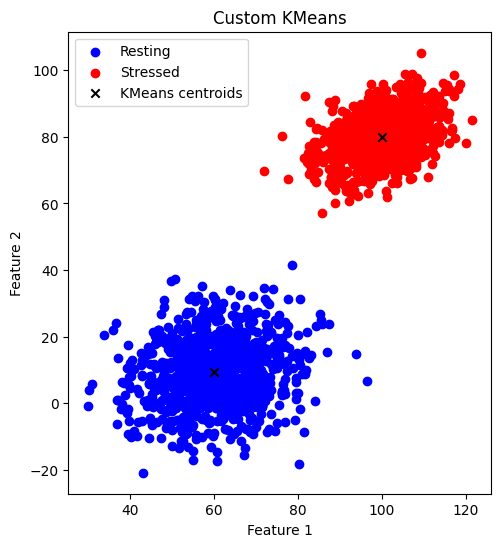

In [5]:
#custom KMeans model
custom_kmeans = KMeans(n_clust=2)
custom_kmeans.fit(np.vstack([resting, stressed]))

#Scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(resting[:, 0], resting[:, 1], color='blue', label='Resting')
plt.scatter(stressed[:, 0], stressed[:, 1], color='red', label='Stressed')
plt.scatter(custom_kmeans.centroids[:, 0], custom_kmeans.centroids[:, 1], color='black', marker='x', label='KMeans centroids')
plt.title('Custom KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()



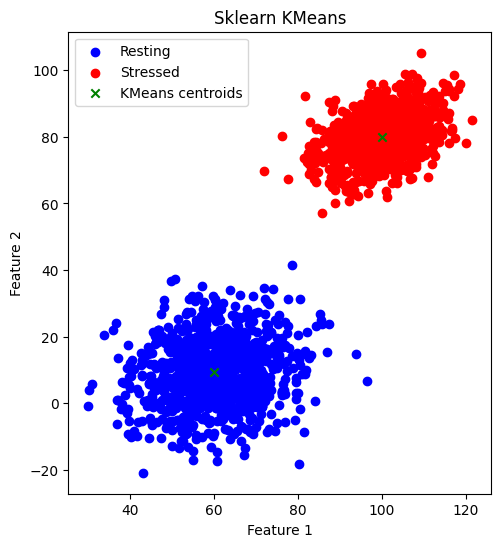

In [6]:
#sklearn KMeans model
normal_kmeans = KMeans(n_clust=2)
normal_kmeans.fit(np.vstack([resting, stressed]))


#Scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.scatter(resting[:, 0], resting[:, 1], color='blue', label='Resting')
plt.scatter(stressed[:, 0], stressed[:, 1], color='red', label='Stressed')
plt.scatter(normal_kmeans.cluster_centers_[:, 0], normal_kmeans.cluster_centers_[:, 1], color='green', marker='x', label='KMeans centroids')
plt.title('Sklearn KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.show()

# Part 2 - PCA

In [7]:
#iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal length", "sepal width", "petal length", "petal width", "species"]
iris_df = pd.read_csv(url, header=None, names=columns)


In [8]:
# Drop NaN values and select relevant columns
iris_df.dropna(inplace=True)
selected_columns = ["sepal length", "sepal width", "petal length", "petal width"]
iris_df = iris_df[selected_columns]



In [9]:
# Perform PCA using custom implementation
custom_pca = PrincipleComponentAnalysis()
custom_pca.fit(iris_df.values, thresh=0.95)
print("Custom PCA Projection Matrix:")
print(custom_pca.model_params['Projection Matrix'])



Custom PCA Projection Matrix:
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [10]:
import pandas as pd
from sklearn.decomposition import PCA

number = iris_df.select_dtypes(include=['float64', 'int64'])

# Perform PCA using sklearn
normal_pca = PCA(n_components=0.95)
normal_projection = normal_pca.fit_transform(number)


In [11]:
# Display the projection matrix
projection_matrix = pd.DataFrame(normal_pca.components_, columns=number.columns)
print("Projection Matrix:")
print(projection_matrix)

Projection Matrix:
   sepal length  sepal width  petal length  petal width
0       0.36159    -0.082269      0.856572     0.358844
1       0.65654     0.729712     -0.175767    -0.074706


# Part 3 - SVM

Preprocess Data

In [12]:
df = pd.read_csv("/Users/khushi/Desktop/RIT/Fundamentals of ML/HW3/pokemon_dataset.csv")

In [13]:
print(df.head)

<bound method NDFrame.head of             Name          Name2 Primary Type Secondary type  Attack  Defense  \
0      Bulbasaur            NaN        GRASS         POISON      49       49   
1        Ivysaur            NaN        GRASS         POISON      62       63   
2       Venusaur            NaN        GRASS         POISON      82       83   
3       Venusaur  Mega Venusaur        GRASS         POISON     100      123   
4     Charmander            NaN         FIRE            NaN      52       43   
...          ...            ...          ...            ...     ...      ...   
1040   Glastrier            NaN          ICE            NaN     145      130   
1041   Spectrier            NaN        GHOST            NaN      65       60   
1042     Calyrex            NaN      PSYCHIC          GRASS      80       80   
1043     Calyrex      Ice Rider      PSYCHIC            ICE     165      150   
1044     Calyrex   Shadow Rider      PSYCHIC          GHOST      85       80   

       HP

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
 11  Legendary       105 non-null    object
dtypes: int64(7), object(5)
memory usage: 98.1+ KB
None


In [15]:
print(df.describe())

            Attack      Defense           HP    Sp.Attack   Sp.Defense  \
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000   
mean     80.466986    74.661244    70.067943    73.022010    72.288995   
std      32.413665    31.237903    26.671411    32.724797    28.074148   
min       5.000000     5.000000     1.000000    10.000000    20.000000   
25%      55.000000    50.000000    50.000000    50.000000    50.000000   
50%      77.000000    70.000000    68.000000    65.000000    70.000000   
75%     100.000000    90.000000    82.000000    95.000000    90.000000   
max     190.000000   250.000000   255.000000   194.000000   250.000000   

             Speed        Total  
count  1045.000000  1045.000000  
mean     68.807656   439.314833  
std      30.210094   121.970701  
min       5.000000   175.000000  
25%      45.000000   330.000000  
50%      65.000000   458.000000  
75%      90.000000   515.000000  
max     200.000000  1125.000000  


In [16]:
# Primary Type analysis
print("Primary Type:")
primary_counts = df['Primary Type'].value_counts()

print(df['Primary Type'].value_counts())

Primary Type:
WATER       134
NORMAL      115
GRASS        91
BUG          81
PSYCHIC      79
FIRE         65
ELECTRIC     62
ROCK         60
DARK         46
GHOST        42
FIGHTING     42
POISON       41
GROUND       41
DRAGON       41
ICE          39
STEEL        36
FAIRY        22
FLYING        8
Name: Primary Type, dtype: int64


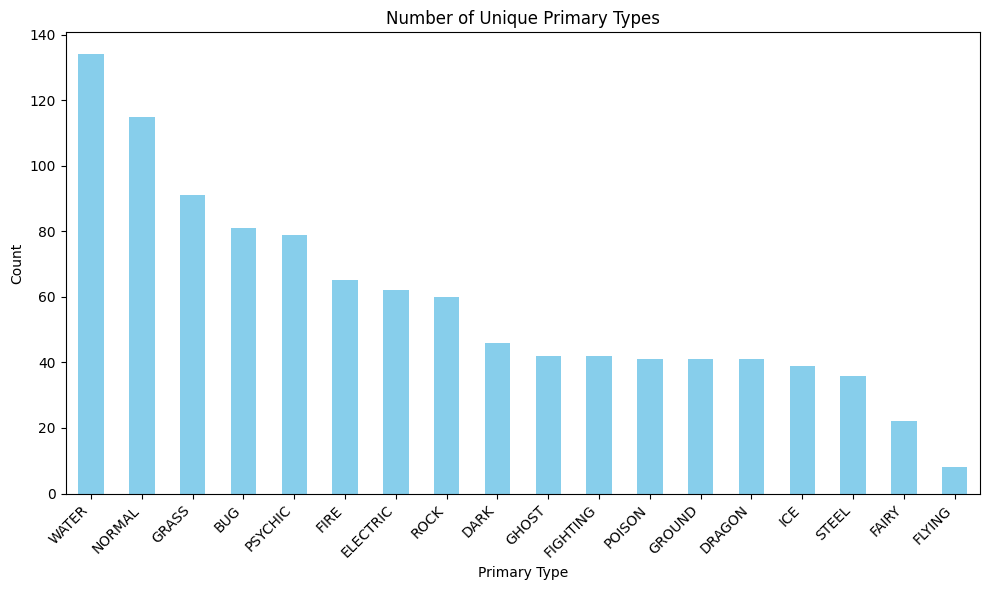

In [17]:

plt.figure(figsize=(10, 6))
primary_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [18]:
#Secondary type analysis
print("\nSecondary type:")
secondary_counts = df['Secondary type'].value_counts()
print(df['Secondary type'].value_counts())



Secondary type:
FLYING      112
PSYCHIC      42
FAIRY        41
GROUND       39
POISON       38
STEEL        35
FIGHTING     32
DRAGON       32
GRASS        28
DARK         27
GHOST        26
WATER        20
ICE          18
FIRE         17
ROCK         15
NORMAL       11
ELECTRIC     11
BUG           9
Name: Secondary type, dtype: int64


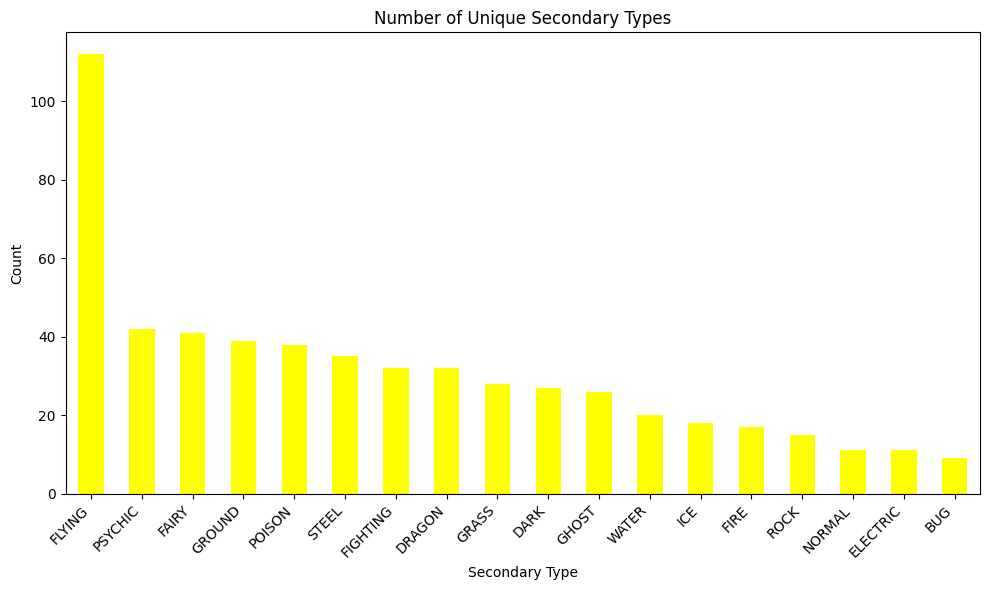

In [19]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
secondary_counts.plot(kind='bar', color='yellow')
plt.title('Number of Unique Secondary Types')
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

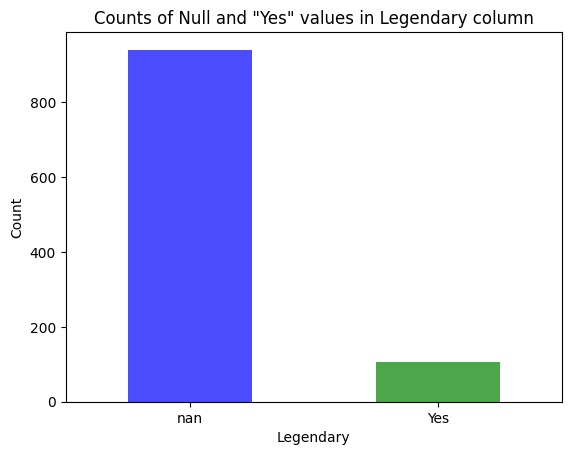

In [20]:
legendary_counts = df['Legendary'].value_counts(dropna=False)


legendary_counts.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Counts of Null and "Yes" values in Legendary column')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Name                0
Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP                  0
Sp.Attack           0
Sp.Defense          0
Speed               0
Total               0
Legendary         940
dtype: int64


2. Preprocessing

In [22]:
# Drop the 'Name' and 'Name2' columns
df.drop(['Name', 'Name2'], axis=1, inplace=True)


In [23]:
#Add values to Secondary Type
df['Secondary type'].fillna(value='None', inplace=True)

In [24]:
#Add values to Legendary
df['Legendary'].fillna(value='No', inplace=True)

In [25]:
print(df.isnull().sum())

Primary Type      0
Secondary type    0
Attack            0
Defense           0
HP                0
Sp.Attack         0
Sp.Defense        0
Speed             0
Total             0
Legendary         0
dtype: int64


In [26]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Primary Type'] = label_encoder.fit_transform(df['Primary Type'])
df['Secondary type'] = label_encoder.fit_transform(df['Secondary type'])
df['Legendary'] = label_encoder.fit_transform(df['Legendary'])


In [27]:
print(df.head)

<bound method NDFrame.head of       Primary Type  Secondary type  Attack  Defense   HP  Sp.Attack  \
0                9              14      49       49   45         65   
1                9              14      62       63   60         80   
2                9              14      82       83   80        100   
3                9              14     100      123   80        122   
4                6              13      52       43   39         60   
...            ...             ...     ...      ...  ...        ...   
1040            11              13     145      130  100         65   
1041             8              13      65       60  100        145   
1042            14               9      80       80  100         80   
1043            14              11     165      150  100         85   
1044            14               8      85       80  100        165   

      Sp.Defense  Speed  Total  Legendary  
0             65     45    318          0  
1             80     60    40

In [28]:
# Splitting the dataset into training and testing sets
X = df.drop(['Legendary'], axis=1)
y = df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
# Splitting the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Method 1: Stratified sampling

In [30]:
from sklearn.model_selection import StratifiedKFold

# Stratified Sampling
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [31]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear','rbf']
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [32]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)




Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [33]:
# Best cross-validation accuracy
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Cross-validation Accuracy: 0.9281314470969644


In [34]:
# Applying the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluating the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9363057324840764
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       290
           1       0.57      0.67      0.62        24

    accuracy                           0.94       314
   macro avg       0.77      0.81      0.79       314
weighted avg       0.94      0.94      0.94       314



Method 2 : k-fold Cross validation

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [36]:
# Hyperparameter tuning 
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear', 'rbf']
}


In [37]:
svm = SVC()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=k_fold, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [38]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [39]:
# Best cross-validation accuracy
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Cross-validation Accuracy: 0.9297524314765694


In [40]:
# Applying on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



In [41]:
# Evaluating the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9363057324840764
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       290
           1       0.57      0.67      0.62        24

    accuracy                           0.94       314
   macro avg       0.77      0.81      0.79       314
weighted avg       0.94      0.94      0.94       314



Method 3 : SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Legendary', axis=1), df['Legendary'])

In [43]:
# Split data again
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [44]:
# Apply SVM
svm = SVC()
svm.fit(X_train, y_train)



SVC()

In [45]:
# Predict on the validation set
y_val_pred = svm.predict(X_val)



In [46]:
# Evaluate on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))



Validation Accuracy: 0.928030303030303
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       138
           1       0.90      0.95      0.93       126

    accuracy                           0.93       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.93      0.93      0.93       264



In [47]:
# Predict on the test set
y_test_pred = svm.predict(X_test)

# Evaluate on the test set
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9131205673758865
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       270
           1       0.92      0.91      0.92       294

    accuracy                           0.91       564
   macro avg       0.91      0.91      0.91       564
weighted avg       0.91      0.91      0.91       564

